In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re

In [2]:
file_to_load = os.path.join('..','Resources','pokemon.csv')
pokemon_df = pd.read_csv(file_to_load)
pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [5]:
pokemon_df[pokemon_df['weight_kg'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


In [6]:
len(pokemon_df)

801

In [7]:
100 * len(pokemon_df[pokemon_df['weight_kg'].isna()]) / len(pokemon_df)

2.4968789013732833

In [8]:
pokemon_df[pokemon_df['height_m'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


In [9]:
pokemon_df[pokemon_df['percentage_male'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.50,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,NaN,81,95,55,45,electric,steel,6.0,1,0
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.50,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,NaN,82,120,70,70,electric,steel,60.0,1,0
99,"['Soundproof', 'Static', 'Aftermath']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,NaN,100,55,55,100,electric,NaN,10.4,1,0
100,"['Soundproof', 'Static', 'Aftermath']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,NaN,101,80,80,150,electric,NaN,66.6,1,0
119,"['Illuminate', 'Natural Cure', 'Analytic']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,...,NaN,120,70,55,85,water,NaN,34.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.50,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.00,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.00,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.00,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [10]:
pokemon_df.columns.get_loc('percentage_male')

31

In [11]:
clean_pokemon_df = pokemon_df.loc[:,pokemon_df.columns != 'percentage_male']
'percentage_male' in clean_pokemon_df.columns

False

In [12]:
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0


In [13]:
pokemon_df[pokemon_df['height_m'].isna()]['name']

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

In [14]:
clean_pokemon_df.loc[18,'height_m'] = 0.3 
clean_pokemon_df.loc[18,'weight_kg'] = 3.5 

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
clean_pokemon_df.loc[18,'height_m']

0.3

In [16]:
clean_pokemon_df.loc[19,'height_m'] = 0.7 
clean_pokemon_df.loc[19,'weight_kg'] = 18.5

In [17]:
clean_pokemon_df.loc[25,'height_m'] = 0.8 
clean_pokemon_df.loc[25,'weight_kg'] = 30.0

In [18]:
clean_pokemon_df.loc[26,'height_m'] = 0.6 
clean_pokemon_df.loc[26,'weight_kg'] = 12.0

In [19]:
clean_pokemon_df.loc[27,'height_m'] = 1.0 
clean_pokemon_df.loc[27,'weight_kg'] = 29.5

In [20]:
clean_pokemon_df.loc[36,'height_m'] = 0.6
clean_pokemon_df.loc[36,'weight_kg'] = 9.9

In [21]:
clean_pokemon_df.loc[37,'height_m'] = 1.1
clean_pokemon_df.loc[37,'weight_kg'] = 19.9

In [22]:
clean_pokemon_df.loc[49,'height_m'] = 0.2 
clean_pokemon_df.loc[49,'weight_kg'] = 0.8

In [23]:
clean_pokemon_df.loc[50,'height_m'] = 0.7
clean_pokemon_df.loc[50,'weight_kg'] = 33.3

In [24]:
clean_pokemon_df.loc[51,'height_m'] = 0.4
clean_pokemon_df.loc[51,'weight_kg'] = 4.2

In [25]:
clean_pokemon_df.loc[52,'height_m'] = 1.0
clean_pokemon_df.loc[52,'weight_kg'] = 32.0

In [26]:
clean_pokemon_df.loc[73,'height_m'] = 0.4
clean_pokemon_df.loc[73,'weight_kg'] = 20.0

In [27]:
clean_pokemon_df.loc[74,'height_m'] = 1.0
clean_pokemon_df.loc[74,'weight_kg'] = 105.0

In [28]:
clean_pokemon_df.loc[75,'height_m'] = 1.4
clean_pokemon_df.loc[75,'weight_kg'] = 300.0

In [29]:
clean_pokemon_df.loc[87,'height_m'] = 0.9
clean_pokemon_df.loc[87,'weight_kg'] = 30.0

In [30]:
clean_pokemon_df.loc[88,'height_m'] = 1.2
clean_pokemon_df.loc[88,'weight_kg'] = 30.0

In [31]:
clean_pokemon_df.loc[102,'height_m'] = 2.0
clean_pokemon_df.loc[102,'weight_kg'] = 120.0

In [32]:
clean_pokemon_df.loc[104,'height_m'] = 1.0
clean_pokemon_df.loc[104,'weight_kg'] = 45.0

In [33]:
clean_pokemon_df.loc[719,'height_m'] = 0.5
clean_pokemon_df.loc[719,'weight_kg'] = 9.0

In [34]:
clean_pokemon_df.loc[744,'height_m'] = 0.9
clean_pokemon_df.loc[744,'weight_kg'] = 25.0

In [35]:
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0
is_legendary           0


In [36]:
none_series = clean_pokemon_df[clean_pokemon_df['type2'].isna()]['type2'].apply(lambda x: 'None')

In [37]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2'] = 2

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2'].map(lambda x: 'None') 

3      None
4      None
6      None
7      None
8      None
       ... 
781    None
788    None
789    None
795    None
799    None
Name: type2, Length: 384, dtype: object

In [39]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2'].apply(lambda x: 'None')

3      None
4      None
6      None
7      None
8      None
       ... 
781    None
788    None
789    None
795    None
799    None
Name: type2, Length: 384, dtype: object

In [40]:
clean_pokemon_df.loc[clean_pokemon_df['type2'].isna()]['type2']

3      NaN
4      NaN
6      NaN
7      NaN
8      NaN
      ... 
781    NaN
788    NaN
789    NaN
795    NaN
799    NaN
Name: type2, Length: 384, dtype: object

In [41]:
clean_pokemon_df = clean_pokemon_df.replace(np.nan, 'none')

In [42]:
clean_pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0


In [43]:
clean_pokemon_df.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

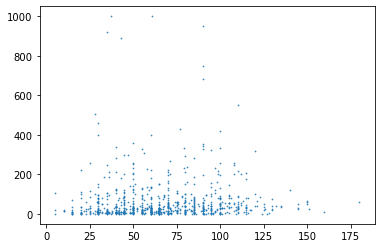

In [44]:
plt.scatter(clean_pokemon_df['speed'],clean_pokemon_df['weight_kg'], s = 0.6, alpha = 0.8)

In [45]:
happiness = clean_pokemon_df.groupby('is_legendary').mean()['base_happiness']
happiness

is_legendary
0    67.865937
1    39.214286
Name: base_happiness, dtype: float64

In [46]:
happiness[0]

67.86593707250341

<BarContainer object of 2 artists>

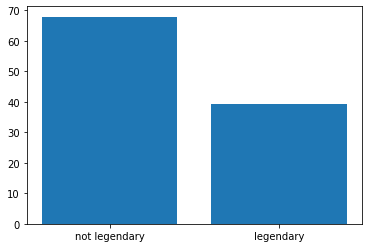

In [47]:
plt.bar(['not legendary', 'legendary'],[happiness[0], happiness[1]])

In [48]:
generations = clean_pokemon_df.groupby('generation').count()
generations

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
generation,,,,,,,,,,,,,,,,,,,,,
1,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
5,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
6,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
7,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [49]:
generations_list = generations.index.tolist()

In [50]:
generations['name']

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: name, dtype: int64

<BarContainer object of 7 artists>

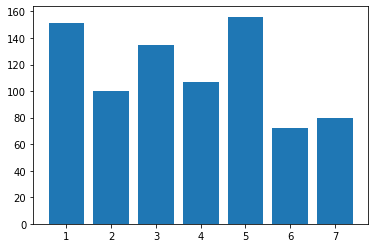

In [51]:
plt.bar(generations_list, generations['name'])

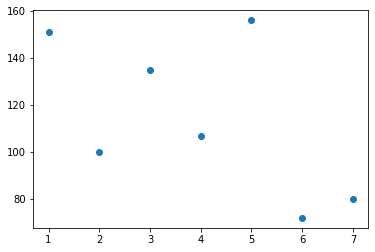

In [52]:
plt.scatter(generations_list, generations['name'])

In [53]:
clean_pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozma,800,127,89,79,psychic,none,230.0,7,1


In [54]:
clean_pokemon_df.corr().iloc[:,18:]

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
against_bug,-0.054175,0.062133,0.009994,-0.012398,-0.036474,0.035717,-0.053908,0.034897,0.004618,0.055352,-0.002342,-0.043802,-0.026321,-0.001549,0.027864
against_dark,-0.098849,0.187220,0.024155,0.065446,0.048039,-0.008391,0.016473,0.010589,0.009066,0.170849,0.132507,-0.000326,0.035384,-0.016013,0.136315
against_dragon,0.138217,0.164773,-0.151915,0.069766,-0.023794,0.172547,0.163279,0.089721,0.000872,0.039739,-0.047416,0.078123,0.125013,-0.025201,0.014844
against_electric,-0.104276,-0.061970,0.030411,-0.017137,-0.072433,-0.041584,0.008831,-0.035354,-0.068552,0.022305,0.019193,0.111422,-0.101647,-0.063180,-0.023151
against_fairy,0.207526,0.120594,-0.209323,0.098948,0.001655,0.146370,0.116623,0.129284,0.176651,-0.010296,0.002754,0.065401,0.099975,0.150801,0.050165
against_fight,0.149123,-0.006359,-0.088722,0.048629,0.150424,0.010407,0.054407,0.109425,0.018296,-0.118481,-0.044460,-0.050495,0.160491,0.000681,-0.059132
against_fire,-0.005762,-0.044802,0.007441,-0.061698,0.037921,-0.027136,-0.080915,-0.099242,0.052012,-0.088578,-0.019520,-0.079129,-0.042872,0.061157,-0.011073
against_flying,-0.002991,-0.091304,0.056480,-0.106586,-0.127950,0.019100,-0.066974,-0.060624,0.020324,-0.111243,-0.079022,-0.043381,-0.124583,0.058204,-0.062214
against_ghost,-0.034549,0.174115,-0.037205,0.114179,0.136490,0.059262,0.033627,-0.062052,0.063189,0.233309,0.195439,-0.029007,0.048000,0.038027,0.170746
against_grass,0.036787,-0.064971,0.063475,-0.017340,0.139542,-0.039623,0.022892,0.056886,-0.092353,-0.093899,-0.056427,-0.153618,0.056351,-0.107987,-0.070826


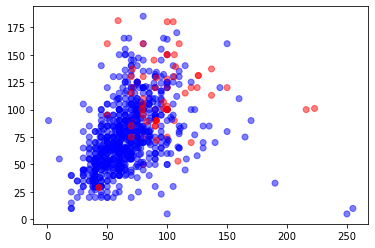

In [55]:
rarity_dict = {0:'blue', 1:'red'}
plt.scatter(clean_pokemon_df['hp'],clean_pokemon_df['attack'], c = clean_pokemon_df['is_legendary'].map(rarity_dict), alpha=0.5)

In [56]:
typing_info = clean_pokemon_df.groupby('type1').mean().iloc[:,18:]
typing_info

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
type1,,,,,,,,,,,,,,,
bug,70.125000,5617.777778,67.083333,380.430556,70.847222,1.009006e+06,0.883333,56.722222,395.916667,56.652778,62.513889,63.569444,33.083333,3.763889,0.041667
dark,87.793103,8386.206897,42.241379,449.758621,70.517241,1.102720e+06,1.296552,72.551724,490.034483,74.517241,69.068966,75.310345,69.096552,4.275862,0.103448
dragon,106.407407,15265.185185,42.962963,522.777778,86.259259,1.216667e+06,1.937037,79.851852,516.296296,89.592593,84.555556,76.111111,107.125926,4.296296,0.259259
electric,70.820513,7056.410256,68.461538,436.153846,61.820513,1.073312e+06,0.976923,60.512821,380.102564,87.538462,70.051282,85.410256,37.741026,3.461538,0.128205
fairy,62.111111,5902.222222,77.777778,427.166667,68.166667,9.138889e+05,0.794444,73.944444,467.000000,81.500000,87.777778,53.666667,23.555556,4.277778,0.055556
fighting,99.178571,5577.142857,70.000000,414.821429,66.392857,1.076021e+06,1.196429,71.428571,404.035714,50.107143,63.428571,64.285714,58.675000,3.750000,0.000000
fire,81.500000,6670.769231,68.461538,450.634615,67.788462,1.064735e+06,1.155769,68.730769,376.403846,87.730769,71.538462,73.346154,64.126923,3.634615,0.096154
flying,66.666667,13653.333333,76.666667,453.333333,65.000000,1.083333e+06,1.166667,68.000000,690.000000,84.000000,70.000000,99.666667,52.000000,5.666667,0.333333
ghost,72.740741,6731.851852,58.333333,434.703704,79.518519,1.018117e+06,1.251852,63.370370,498.814815,82.444444,78.296296,58.333333,69.570370,4.370370,0.037037


In [57]:
types = typing_info.index.tolist()
types

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

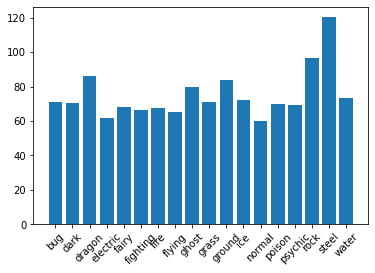

In [58]:
plt.bar(types,typing_info['defense'])
plt.xticks(rotation = 45)

In [59]:
typing_info

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
type1,,,,,,,,,,,,,,,
bug,70.125000,5617.777778,67.083333,380.430556,70.847222,1.009006e+06,0.883333,56.722222,395.916667,56.652778,62.513889,63.569444,33.083333,3.763889,0.041667
dark,87.793103,8386.206897,42.241379,449.758621,70.517241,1.102720e+06,1.296552,72.551724,490.034483,74.517241,69.068966,75.310345,69.096552,4.275862,0.103448
dragon,106.407407,15265.185185,42.962963,522.777778,86.259259,1.216667e+06,1.937037,79.851852,516.296296,89.592593,84.555556,76.111111,107.125926,4.296296,0.259259
electric,70.820513,7056.410256,68.461538,436.153846,61.820513,1.073312e+06,0.976923,60.512821,380.102564,87.538462,70.051282,85.410256,37.741026,3.461538,0.128205
fairy,62.111111,5902.222222,77.777778,427.166667,68.166667,9.138889e+05,0.794444,73.944444,467.000000,81.500000,87.777778,53.666667,23.555556,4.277778,0.055556
fighting,99.178571,5577.142857,70.000000,414.821429,66.392857,1.076021e+06,1.196429,71.428571,404.035714,50.107143,63.428571,64.285714,58.675000,3.750000,0.000000
fire,81.500000,6670.769231,68.461538,450.634615,67.788462,1.064735e+06,1.155769,68.730769,376.403846,87.730769,71.538462,73.346154,64.126923,3.634615,0.096154
flying,66.666667,13653.333333,76.666667,453.333333,65.000000,1.083333e+06,1.166667,68.000000,690.000000,84.000000,70.000000,99.666667,52.000000,5.666667,0.333333
ghost,72.740741,6731.851852,58.333333,434.703704,79.518519,1.018117e+06,1.251852,63.370370,498.814815,82.444444,78.296296,58.333333,69.570370,4.370370,0.037037


In [60]:
count_type = clean_pokemon_df.groupby('type1').count()
count_type

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type2,weight_kg,generation,is_legendary
type1,,,,,,,,,,,,,,,,,,,,,
bug,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
dark,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
dragon,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
electric,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
fairy,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
fighting,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
fire,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
flying,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
ghost,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [61]:
total = count_type['name'].sum()

In [62]:
type_pct = round(count_type['name'] / total * 100,1)
type_pct

type1
bug          9.0
dark         3.6
dragon       3.4
electric     4.9
fairy        2.2
fighting     3.5
fire         6.5
flying       0.4
ghost        3.4
grass        9.7
ground       4.0
ice          2.9
normal      13.1
poison       4.0
psychic      6.6
rock         5.6
steel        3.0
water       14.2
Name: name, dtype: float64

In [63]:
type_pct.values.tolist()

[9.0,
 3.6,
 3.4,
 4.9,
 2.2,
 3.5,
 6.5,
 0.4,
 3.4,
 9.7,
 4.0,
 2.9,
 13.1,
 4.0,
 6.6,
 5.6,
 3.0,
 14.2]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

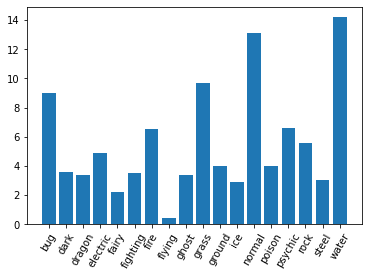

In [64]:
plt.bar(type_pct.index.tolist(), type_pct.values.tolist())
plt.xticks(rotation = 60)

In [65]:
df = clean_pokemon_df.copy()

In [66]:
df.groupby(['type1','type2']).count().head(30)

abilities  against_bug  against_dark  against_dragon  \
type1  type2                                                            
bug    electric          4            4             4               4   
       fairy             2            2             2               2   
       fighting          3            3             3               3   
       fire              2            2             2               2   
       flying           13           13            13              13   
       ghost             1            1             1               1   
       grass             6            6             6               6   
       ground            1            1             1               1   
       none             18           18            18              18   
       poison           11           11            11              11   
       rock              3            3             3               3   
       steel             5            5             5               5   
       water             3            3             3               3   
dark   dragon            4            4             4               4   
       fighting          2            2             2               2   
       fire              2            2             2               2   
       flying            5            5             5               5   
       ghost             1            1             1               1   
       ice               2            2             2               2   
       none              9            9             9               9   
       psychic           2            2             2               2   
       steel             2            2             2               2   
dragon electric          1            1             1               1   
       fighting          2            2             2               2   
       fire              1            1             1               1   
       flying            4            4             4               4   
       ground            4            4             4               4   
       ice               1            1             1               1   
       none             12           12            12              12   
       psychic           2            2             2               2   

                 against_electric  against_fairy  against_fight  against_fire  \
type1  type2                                                                    
bug    electric                 4              4              4             4   
       fairy                    2              2              2             2   
       fighting                 3              3              3             3   
       fire                     2              2              2             2   
       flying                  13             13             13            13   
       ghost                    1              1              1             1   
       grass                    6              6              6             6   
       ground                   1              1              1             1   
       none                    18             18             18            18   
       poison                  11             11             11            11   
       rock                     3              3              3             3   
       steel                    5              5              5             5   
       water                    3              3              3             3   
dark   dragon                   4              4              4             4   
       fighting                 2              2              2             2   
       fire                     2              2              2             2   
       flying                   5              5              5             5   
       ghost                    1              1              1             1   
       ice                      2              2            

In [67]:
clean_pokemon_df[(clean_pokemon_df['type1'] == 'fire') | (clean_pokemon_df['type2'] == 'fire')]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,Charizard,6,159,115,100,fire,flying,90.5,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,Vulpix,37,50,65,65,fire,ice,9.9,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,Ninetales,38,81,100,109,fire,ice,19.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,"['Blaze', 'Intimidate']",1.00,0.5,1.0,1.0,1.00,2.0,0.50,1.0,0.5,...,Incineroar,727,80,90,60,fire,dark,83.0,7,0
740,['Dancer'],0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,Oricorio,741,98,70,93,fire,flying,3.4,7,0
756,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,Salandit,757,71,40,77,poison,fire,4.8,7,0
757,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,Salazzle,758,111,60,117,poison,fire,22.2,7,0


In [68]:
types = count_type.index.tolist()
types

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

In [69]:
type_dict = dict()
for _type in types:
    type_dict[_type] = clean_pokemon_df[(clean_pokemon_df['type1'] == _type) | (clean_pokemon_df['type2'] == _type)]

In [70]:
len(type_dict['bug'])

77

In [71]:
types

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

In [72]:
num_list = []
for _type in types:
    length = len(type_dict[_type])
    num_list.append(length)
num_list

[77, 50, 44, 47, 47, 53, 64, 98, 41, 97, 64, 38, 109, 64, 82, 59, 46, 131]

In [73]:
pct_list = num_list / total * 100
pct_list.tolist()

[9.61298377028714,
 6.242197253433209,
 5.493133583021224,
 5.867665418227216,
 5.867665418227216,
 6.6167290886392,
 7.990012484394507,
 12.234706616729088,
 5.118601747815231,
 12.109862671660425,
 7.990012484394507,
 4.7440699126092385,
 13.607990012484395,
 7.990012484394507,
 10.237203495630462,
 7.365792759051186,
 5.742821473158552,
 16.354556803995006]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

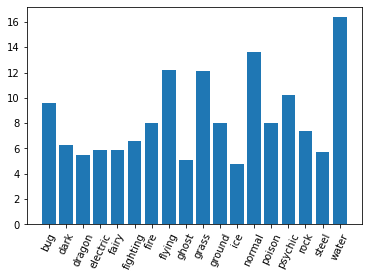

In [74]:
plt.bar(types, pct_list.tolist())
plt.xticks(rotation = 65)

In [75]:
clean_pokemon_df.base_total

0      318
1      405
2      625
3      309
4      405
      ... 
796    570
797    570
798    570
799    600
800    600
Name: base_total, Length: 801, dtype: int64

In [76]:
type_dict['bug']['base_total'].mean()

380.4415584415584

(300.0, 520.0)

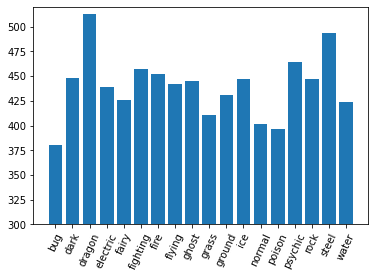

In [77]:
types_base_total = list()
for _type in types:
    _mean = type_dict[_type]['base_total'].mean()
    types_base_total.append(round(_mean,0))

plt.bar(types, types_base_total)
plt.xticks(rotation = 65)
plt.ylim(300, 520)

(40.0, 110.0)

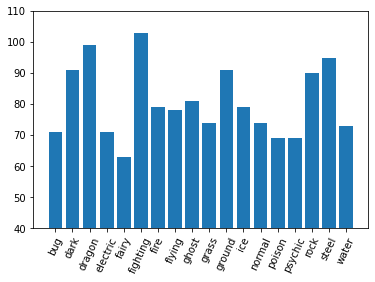

In [78]:
types_attack = list()
for _type in types:
    _mean = type_dict[_type]['attack'].mean()
    types_attack.append(round(_mean,0))

plt.bar(types, types_attack)
plt.xticks(rotation = 65)
plt.ylim(40,110)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

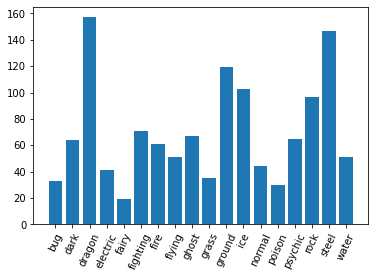

In [79]:
types_weight = list()
for _type in types:
    _mean = type_dict[_type]['weight_kg'].mean()
    types_weight.append(round(_mean,0))

plt.bar(types, types_weight)
plt.xticks(rotation = 65)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

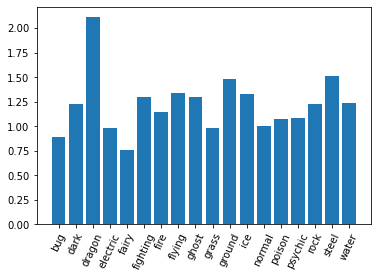

In [80]:
types_height = list()
for _type in types:
    _mean = type_dict[_type]['height_m'].mean()
    types_height.append(_mean)

plt.bar(types, types_height)
plt.xticks(rotation = 65)

In [81]:
clean_pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozma,800,127,89,79,psychic,none,230.0,7,1


In [82]:
the_list = clean_pokemon_df.abilities.values
the_list

array(["['Overgrow', 'Chlorophyll']", "['Overgrow', 'Chlorophyll']",
       "['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Blaze', 'Solar Power']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Torrent', 'Rain Dish']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Shield Dust', 'Run Away']", "['Shed Skin']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
       "['Keen Eye', 'Sniper']", "['Keen Eye', 'Sniper']",
       "['Intimidate', 'Shed Skin', 'Unnerve']",
       "['Intimidate', 'Shed Skin', 'Unnerve']",
       "['Static', 'Lightningrod']",
       "['Static', 'Lightningrod',

In [83]:
counter = 1
abilities_list = []
for l in the_list:
    abilities = l.split(',')
    for ability in abilities:
        match = re.search(pattern=r'[A-Z][a-z]+', string = ability)
        if match is not None:
            print(match.group())
            if match.group() not in abilities_list:
                abilities_list.append(match.group())
        else:
            print(match)
        

Overgrow
Chlorophyll
Overgrow
Chlorophyll
Overgrow
Chlorophyll
Blaze
Solar
Blaze
Solar
Blaze
Solar
Torrent
Rain
Torrent
Rain
Torrent
Rain
Shield
Run
Shed
Compoundeyes
Tinted
Shield
Run
Shed
Swarm
Sniper
Keen
Tangled
Big
Keen
Tangled
Big
Keen
Tangled
Big
Run
Guts
Hustle
Gluttony
Hustle
Thick
Run
Guts
Hustle
Gluttony
Hustle
Thick
Keen
Sniper
Keen
Sniper
Intimidate
Shed
Unnerve
Intimidate
Shed
Unnerve
Static
Lightningrod
Static
Lightningrod
Surge
Sand
Sand
Snow
Slush
Sand
Sand
Snow
Slush
Poison
Rivalry
Hustle
Poison
Rivalry
Hustle
Poison
Rivalry
Sheer
Poison
Rivalry
Hustle
Poison
Rivalry
Hustle
Poison
Rivalry
Sheer
Cute
Magic
Friend
Cute
Magic
Unaware
Flash
Drought
Snow
Snow
Flash
Drought
Snow
Snow
Cute
Competitive
Friend
Cute
Competitive
Frisk
Inner
Infiltrator
Inner
Infiltrator
Chlorophyll
Run
Chlorophyll
Stench
Chlorophyll
Effect
Effect
Dry
Damp
Effect
Dry
Damp
Compoundeyes
Tinted
Run
Shield
Tinted
Wonder
Sand
Arena
Sand
Sand
Tangling
Sand
Sand
Arena
Sand
Sand
Tangling
Sand
Pickup
Tech

Shield
Sweet
Honey
Shield
Sweet
Keen
Vital
Steadfast
Keen
Sand
Steadfast
Keen
Vital
No
Schooling
Merciless
Limber
Regenerator
Merciless
Limber
Regenerator
Own
Stamina
Inner
Own
Stamina
Inner
Water
Water
Water
Water
Leaf
Contrary
Leaf
Contrary
Illuminate
Effect
Rain
Illuminate
Effect
Rain
Corrosion
Oblivious
Corrosion
Oblivious
Fluffy
Klutz
Cute
Fluffy
Klutz
Unnerve
Leaf
Oblivious
Sweet
Leaf
Oblivious
Sweet
Leaf
Queenly
Sweet
Flower
Triage
Natural
Inner
Telepathy
Symbiosis
Receiver
Defiant
Wimp
Emergency
Water
Sand
Water
Sand
Innards
Unaware
Battle
System
Shields
Comatose
Shell
Iron
Lightningrod
Sturdy
Disguise
Dazzling
Strong
Wonder
Berserk
Sap
Cloud
Steelworker
Bulletproof
Soundproof
Overcoat
Bulletproof
Soundproof
Overcoat
Bulletproof
Soundproof
Overcoat
Electric
Telepathy
Psychic
Telepathy
Grassy
Telepathy
Misty
Telepathy
Unaware
Sturdy
Full
Shadow
Beast
Beast
Beast
Beast
Beast
Beast
Beast
Prism
Soul


In [84]:
abilities_list

['Overgrow',
 'Chlorophyll',
 'Blaze',
 'Solar',
 'Torrent',
 'Rain',
 'Shield',
 'Run',
 'Shed',
 'Compoundeyes',
 'Tinted',
 'Swarm',
 'Sniper',
 'Keen',
 'Tangled',
 'Big',
 'Guts',
 'Hustle',
 'Gluttony',
 'Thick',
 'Intimidate',
 'Unnerve',
 'Static',
 'Lightningrod',
 'Surge',
 'Sand',
 'Snow',
 'Slush',
 'Poison',
 'Rivalry',
 'Sheer',
 'Cute',
 'Magic',
 'Friend',
 'Unaware',
 'Flash',
 'Drought',
 'Competitive',
 'Frisk',
 'Inner',
 'Infiltrator',
 'Stench',
 'Effect',
 'Dry',
 'Damp',
 'Wonder',
 'Arena',
 'Tangling',
 'Pickup',
 'Technician',
 'Rattled',
 'Limber',
 'Fur',
 'Cloud',
 'Swift',
 'Vital',
 'Anger',
 'Defiant',
 'Justified',
 'Water',
 'Synchronize',
 'No',
 'Steadfast',
 'Clear',
 'Liquid',
 'Rock',
 'Sturdy',
 'Magnet',
 'Galvanize',
 'Flame',
 'Oblivious',
 'Own',
 'Regenerator',
 'Analytic',
 'Early',
 'Hydration',
 'Ice',
 'Sticky',
 'Power',
 'Shell',
 'Skill',
 'Overcoat',
 'Levitate',
 'Cursed',
 'Weak',
 'Insomnia',
 'Forewarn',
 'Hyper',
 'Soundproof',

In [85]:
clean_pokemon_df.head(20)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,Charizard,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,Squirtle,7,50,64,43,water,none,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,Wartortle,8,65,80,58,water,none,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,Blastoise,9,135,115,78,water,none,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,Caterpie,10,20,20,45,bug,none,2.9,1,0


In [86]:
df['abilities']=df['abilities'].str.strip('\"[')

In [87]:
df['abilities'] = df['abilities'].str.strip(']\"')

In [88]:
df['abilities'] = df['abilities'].str.split(',')

In [89]:
df['abilities']

0      ['Overgrow',  'Chlorophyll']
1      ['Overgrow',  'Chlorophyll']
2      ['Overgrow',  'Chlorophyll']
3         ['Blaze',  'Solar Power']
4         ['Blaze',  'Solar Power']
                   ...             
796                 ['Beast Boost']
797                 ['Beast Boost']
798                 ['Beast Boost']
799                 ['Prism Armor']
800                  ['Soul-Heart']
Name: abilities, Length: 801, dtype: object

In [90]:
df['ability1'] = None
df['ability2'] = None
df['ability3'] = None
df['ability4'] = None
df['ability5'] = None
df['ability6'] = None

In [91]:
index = 0
maximum = 0
for row in df.iterrows():
    abilities = row[1][0]
    if len(abilities) > maximum:
        maximum = len(abilities)
    type_counter = 1
    for ability in abilities:
        if type_counter == 1:
            df.iloc[index, 40] = ability
        elif type_counter == 2:
            df.iloc[index, 41] = ability
        elif type_counter == 3:
            df.iloc[index, 42] = ability
        elif type_counter == 4:
            df.iloc[index, 43] = ability
        elif type_counter == 5:
            df.iloc[index, 44] = ability
        else:
            df.iloc[index, 45] = ability
        type_counter += 1
#         print(index, type_counter, ability)
    index += 1
print(maximum)

6


In [92]:
df.head(20)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,type2,weight_kg,generation,is_legendary,ability1,ability2,ability3,ability4,ability5,ability6
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,poison,6.9,1,0,'Overgrow','Chlorophyll',None,None,None,None
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,poison,13.0,1,0,'Overgrow','Chlorophyll',None,None,None,None
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,poison,100.0,1,0,'Overgrow','Chlorophyll',None,None,None,None
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,none,8.5,1,0,'Blaze','Solar Power',None,None,None,None
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,none,19.0,1,0,'Blaze','Solar Power',None,None,None,None
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,flying,90.5,1,0,'Blaze','Solar Power',None,None,None,None
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,none,9.0,1,0,'Torrent','Rain Dish',None,None,None,None
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,none,22.5,1,0,'Torrent','Rain Dish',None,None,None,None
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,none,85.5,1,0,'Torrent','Rain Dish',None,None,None,None
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,none,2.9,1,0,'Shield Dust','Run Away',None,None,None,None


In [93]:
against = df.columns.tolist()[1:19]

In [95]:
df['against_sum'] = 0
total = 0
total = df[against].sum()

In [169]:
types_dict = {}
for i,j in list(enumerate(df[against].iterrows())):
#     print(sum(j[1].values.tolist()))
    types_dict[i] = sum(j[1].values.tolist())
#     print(re.match(pattern = '[+-]?([0-9]*[.])?[0-9]+', string= j[1].str))
types_dict

{0: 19.25,
 1: 19.25,
 2: 19.25,
 3: 18.0,
 4: 18.0,
 5: 18.5,
 6: 18.0,
 7: 18.0,
 8: 18.0,
 9: 19.5,
 10: 19.5,
 11: 22.0,
 12: 19.0,
 13: 19.0,
 14: 19.0,
 15: 18.0,
 16: 18.0,
 17: 18.0,
 18: 18.0,
 19: 18.0,
 20: 18.0,
 21: 18.0,
 22: 17.5,
 23: 17.5,
 24: 17.5,
 25: 17.5,
 26: 19.0,
 27: 19.0,
 28: 17.5,
 29: 17.5,
 30: 18.25,
 31: 17.5,
 32: 17.5,
 33: 18.25,
 34: 17.5,
 35: 17.5,
 36: 18.0,
 37: 18.0,
 38: 17.0,
 39: 17.0,
 40: 17.75,
 41: 17.75,
 42: 19.25,
 43: 19.25,
 44: 19.25,
 45: 25.0,
 46: 25.0,
 47: 19.0,
 48: 19.0,
 49: 19.0,
 50: 19.0,
 51: 18.0,
 52: 18.0,
 53: 18.0,
 54: 18.0,
 55: 19.5,
 56: 19.5,
 57: 18.0,
 58: 18.0,
 59: 18.0,
 60: 18.0,
 61: 19.5,
 62: 20.0,
 63: 20.0,
 64: 20.0,
 65: 19.5,
 66: 19.5,
 67: 19.5,
 68: 19.25,
 69: 19.25,
 70: 19.25,
 71: 17.0,
 72: 17.0,
 73: 24.25,
 74: 24.25,
 75: 24.25,
 76: 18.0,
 77: 18.0,
 78: 20.0,
 79: 20.0,
 80: 16.0,
 81: 16.0,
 82: 18.0,
 83: 18.0,
 84: 18.0,
 85: 18.0,
 86: 20.75,
 87: 17.5,
 88: 17.5,
 89: 18.0,
 90

In [170]:
pd.Series(types_dict)

0      19.25
1      19.25
2      19.25
3      18.00
4      18.00
       ...  
796    13.50
797    16.25
798    21.00
799    20.00
800    13.25
Length: 801, dtype: float64

In [171]:
df['against_sum'] = pd.Series(types_dict)

In [172]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,weight_kg,generation,is_legendary,ability1,ability2,ability3,ability4,ability5,ability6,against_sum
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,6.9,1,0,'Overgrow','Chlorophyll',None,None,None,None,19.25
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,13.0,1,0,'Overgrow','Chlorophyll',None,None,None,None,19.25
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,100.0,1,0,'Overgrow','Chlorophyll',None,None,None,None,19.25
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,8.5,1,0,'Blaze','Solar Power',None,None,None,None,18.00
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,19.0,1,0,'Blaze','Solar Power',None,None,None,None,18.00


In [175]:
df['against_sum'].min()
df['against_sum'].loc[df['against_sum'] == df['against_sum'].min()]

302    13.25
706    13.25
800    13.25
Name: against_sum, dtype: float64

In [180]:
df.iloc[[302,706,800]].iloc[:,31:]

,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,ability1,ability2,ability3,ability4,ability5,ability6,against_sum
302,303,55,95,50,steel,fairy,11.5,3,0,'Hyper Cutter','Intimidate','Sheer Force',None,None,None,13.25
706,707,80,87,75,steel,fairy,3.0,6,0,'Prankster','Magician',None,None,None,None,13.25
800,801,130,115,65,steel,fairy,80.5,7,1,'Soul-Heart',None,None,None,None,None,13.25


In [181]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,weight_kg,generation,is_legendary,ability1,ability2,ability3,ability4,ability5,ability6,against_sum
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,6.9,1,0,'Overgrow','Chlorophyll',None,None,None,None,19.25
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,13.0,1,0,'Overgrow','Chlorophyll',None,None,None,None,19.25
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,100.0,1,0,'Overgrow','Chlorophyll',None,None,None,None,19.25
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,8.5,1,0,'Blaze','Solar Power',None,None,None,None,18.00
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,19.0,1,0,'Blaze','Solar Power',None,None,None,None,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,999.9,7,1,'Beast Boost',None,None,None,None,None,13.50
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0.1,7,1,'Beast Boost',None,None,None,None,None,16.25
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,888.0,7,1,'Beast Boost',None,None,None,None,None,21.00
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,230.0,7,1,'Prism Armor',None,None,None,None,None,20.00


In [189]:
generation_means = df.groupby('generation').mean().iloc[:,20:]

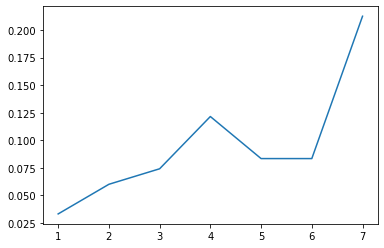

In [190]:
plt.plot(generation_means.index, generation_means['is_legendary'])

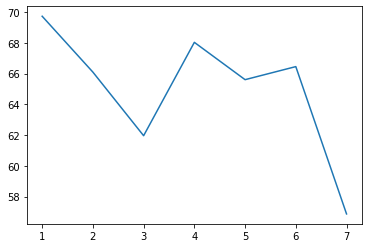

In [191]:
plt.plot(generation_means.index, generation_means['base_happiness'])

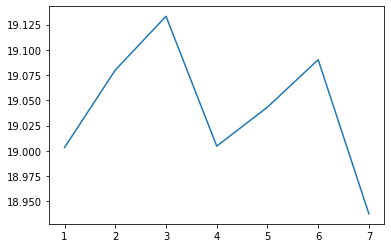

In [192]:
plt.plot(generation_means.index, generation_means['against_sum'])

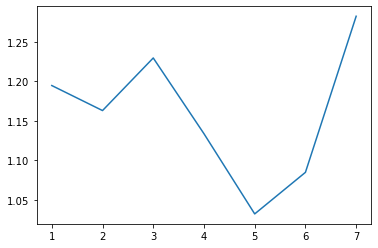

In [193]:
plt.plot(generation_means.index, generation_means['height_m'])

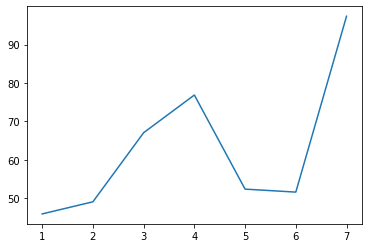

In [195]:
plt.plot(generation_means.index, generation_means['weight_kg'])